In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
import missingno as msn

In [37]:
df = pd.read_csv('Data/county_data_clean.csv').drop(columns='Unnamed: 0')

The first step to take in our EDA was to determine what outliers exist, if any. The first round of outlier detection is looking at univariate outliers for each of the features using boxplots (so, not taking into account uninsured, uninsured_adults, or uninsured_children). The code below filters out any outliers within each state's data. The sample data was at the state level, not nationwide. No outliers were detected in this scenario.

Source: https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

In [38]:
indep_features_list = df.drop(columns=['uninsured', 'uninsured_adults', 'uninsured_children']).columns.to_list()

for state in df.state_abbreviation.unique():
    Q1 = df[df.state_abbreviation==state][indep_features_list].quantile(0.25)
    Q3 = df[df.state_abbreviation==state][indep_features_list].quantile(0.75)
    IQR = Q3 - Q1
    
    df[df.state_abbreviation==state][indep_features_list] = df[df.state_abbreviation==state][indep_features_list]\
    [~((df[df.state_abbreviation==state][indep_features_list]< (Q1 - 1.5 * IQR)) |\
       (df[df.state_abbreviation==state][indep_features_list] > (Q3 + 1.5 * IQR))).any(axis=1)]





<ipython-input-38-8e21f5b3add2>:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  [~((df[df.state_abbreviation==state][indep_features_list]< (Q1 - 1.5 * IQR)) |\
<ipython-input-38-8e21f5b3add2>:10: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  (df[df.state_abbreviation==state][indep_features_list] > (Q3 + 1.5 * IQR))).any(axis=1)]
/opt/conda/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

<ipython-input-38-8e21f5b3add2>:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  [~((df[df.state_abbreviation==state][indep_features_list]< (Q1 - 1.5 * IQR)) |\
<ipython-input-38-8e21f5b3add2>:10: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  (df[df.state_abbreviation==state][indep_features_list] > (Q3 + 1.5 * IQR))).any(axis=1)]
/opt/conda/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

<ipython-input-38-8e21f5b3add2>:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  [~((df[df.state_abbreviation==state][indep_features_list]< (Q1 - 1.5 * IQR)) |\
<ipython-input-38-8e21f5b3add2>:10: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  (df[df.state_abbreviation==state][indep_features_list] > (Q3 + 1.5 * IQR))).any(axis=1)]
/opt/conda/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

<ipython-input-38-8e21f5b3add2>:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  [~((df[df.state_abbreviation==state][indep_features_list]< (Q1 - 1.5 * IQR)) |\
<ipython-input-38-8e21f5b3add2>:10: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  (df[df.state_abbreviation==state][indep_features_list] > (Q3 + 1.5 * IQR))).any(axis=1)]
/opt/conda/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

<ipython-input-38-8e21f5b3add2>:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  [~((df[df.state_abbreviation==state][indep_features_list]< (Q1 - 1.5 * IQR)) |\
<ipython-input-38-8e21f5b3add2>:10: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  (df[df.state_abbreviation==state][indep_features_list] > (Q3 + 1.5 * IQR))).any(axis=1)]
/opt/conda/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

<ipython-input-38-8e21f5b3add2>:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  [~((df[df.state_abbreviation==state][indep_features_list]< (Q1 - 1.5 * IQR)) |\
<ipython-input-38-8e21f5b3add2>:10: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  (df[df.state_abbreviation==state][indep_features_list] > (Q3 + 1.5 * IQR))).any(axis=1)]
/opt/conda/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

<ipython-input-38-8e21f5b3add2>:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  [~((df[df.state_abbreviation==state][indep_features_list]< (Q1 - 1.5 * IQR)) |\
<ipython-input-38-8e21f5b3add2>:10: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  (df[df.state_abbreviation==state][indep_features_list] > (Q3 + 1.5 * IQR))).any(axis=1)]
/opt/conda/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

In [39]:
df.head()

,state_fips_code,county_fips_code,5_digit_fips_code,state_abbreviation,name,premature_death,premature_death_black,premature_death_hispanic,premature_death_white,poor_or_fair_health,...,male_population_18_44,male_population_45_64,male_population_65,total_male_population,female_population_0_17,female_population_18_44,female_population_45_64,female_population_65,total_female_population,population_growth
0,0,0,0,US,United States,6900.630354,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0,1000,AL,Alabama,9917.232898,NaN,NaN,NaN,0.214024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1,1001,AL,Autauga County,8824.057123,10471.252986,NaN,8706.658832,0.184111,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,3,1003,AL,Baldwin County,7224.632160,10042.472874,3086.605695,7277.780727,0.180605,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,1005,AL,Barbour County,9586.165037,11332.562909,NaN,7309.636719,0.257734,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Looking at correlation values

In [66]:
for state in df.state_abbreviation.unique():   
    corr = df[df.state_abbreviation==state].drop(columns=['state_fips_code', 'county_fips_code', '5_digit_fips_code', 'uninsured', 'uninsured_adults',
                            'uninsured_children']).corr()
    corr = corr[(corr > -0.7) & (corr < 0.7)]
    print("State of " + state)
    print(corr)

State of US
                          premature_death  premature_death_black  \
premature_death                       NaN                    NaN   
premature_death_black                 NaN                    NaN   
premature_death_hispanic              NaN                    NaN   
premature_death_white                 NaN                    NaN   
poor_or_fair_health                   NaN                    NaN   
...                                   ...                    ...   
female_population_18_44               NaN                    NaN   
female_population_45_64               NaN                    NaN   
female_population_65                  NaN                    NaN   
total_female_population               NaN                    NaN   
population_growth                     NaN                    NaN   

                          premature_death_hispanic  premature_death_white  \
premature_death                                NaN                    NaN   
premature_death_b

                          premature_death  premature_death_black  \
premature_death                       NaN              -0.054210   
premature_death_black           -0.054210                    NaN   
premature_death_hispanic              NaN              -0.098223   
premature_death_white                 NaN              -0.484901   
poor_or_fair_health              0.382844              -0.385267   
...                                   ...                    ...   
female_population_18_44               NaN                    NaN   
female_population_45_64               NaN                    NaN   
female_population_65                  NaN                    NaN   
total_female_population               NaN                    NaN   
population_growth                     NaN                    NaN   

                          premature_death_hispanic  premature_death_white  \
premature_death                                NaN                    NaN   
premature_death_black        

                          premature_death  premature_death_black  \
premature_death                       NaN                    NaN   
premature_death_black                 NaN                    NaN   
premature_death_hispanic              NaN                    NaN   
premature_death_white                 NaN                    NaN   
poor_or_fair_health              0.599339                    NaN   
...                                   ...                    ...   
female_population_18_44               NaN                    NaN   
female_population_45_64               NaN                    NaN   
female_population_65                  NaN                    NaN   
total_female_population               NaN                    NaN   
population_growth                     NaN                    NaN   

                          premature_death_hispanic  premature_death_white  \
premature_death                                NaN                    NaN   
premature_death_black        

                          premature_death  premature_death_black  \
premature_death                       NaN                    NaN   
premature_death_black                 NaN                    NaN   
premature_death_hispanic              NaN                    NaN   
premature_death_white                 NaN                    NaN   
poor_or_fair_health                   NaN                    NaN   
...                                   ...                    ...   
female_population_18_44               NaN                    NaN   
female_population_45_64               NaN                    NaN   
female_population_65                  NaN                    NaN   
total_female_population               NaN                    NaN   
population_growth                     NaN                    NaN   

                          premature_death_hispanic  premature_death_white  \
premature_death                                NaN                    NaN   
premature_death_black        

                          premature_death  premature_death_black  \
premature_death                       NaN                    NaN   
premature_death_black                 NaN                    NaN   
premature_death_hispanic              NaN                    NaN   
premature_death_white                 NaN              -0.340153   
poor_or_fair_health                   NaN                    NaN   
...                                   ...                    ...   
female_population_18_44               NaN                    NaN   
female_population_45_64               NaN                    NaN   
female_population_65                  NaN                    NaN   
total_female_population               NaN                    NaN   
population_growth                     NaN                    NaN   

                          premature_death_hispanic  premature_death_white  \
premature_death                                NaN                    NaN   
premature_death_black        

State of IN
                          premature_death  premature_death_black  \
premature_death                       NaN               0.553178   
premature_death_black            0.553178                    NaN   
premature_death_hispanic         0.644515               0.362509   
premature_death_white                 NaN               0.439563   
poor_or_fair_health              0.578367               0.485550   
...                                   ...                    ...   
female_population_18_44               NaN                    NaN   
female_population_45_64               NaN                    NaN   
female_population_65                  NaN                    NaN   
total_female_population               NaN                    NaN   
population_growth                     NaN                    NaN   

                          premature_death_hispanic  premature_death_white  \
premature_death                           0.644515                    NaN   
premature_death_b

                          premature_death  premature_death_black  \
premature_death                       NaN                    NaN   
premature_death_black                 NaN                    NaN   
premature_death_hispanic         0.652026               0.596508   
premature_death_white                 NaN                    NaN   
poor_or_fair_health              0.137532               0.553926   
...                                   ...                    ...   
female_population_18_44               NaN                    NaN   
female_population_45_64               NaN                    NaN   
female_population_65                  NaN                    NaN   
total_female_population               NaN                    NaN   
population_growth                     NaN                    NaN   

                          premature_death_hispanic  premature_death_white  \
premature_death                           0.652026                    NaN   
premature_death_black        

                          premature_death  premature_death_black  \
premature_death                       NaN                    NaN   
premature_death_black                 NaN                    NaN   
premature_death_hispanic              NaN                    NaN   
premature_death_white                 NaN                    NaN   
poor_or_fair_health              0.658447                    NaN   
...                                   ...                    ...   
female_population_18_44               NaN                    NaN   
female_population_45_64               NaN                    NaN   
female_population_65                  NaN                    NaN   
total_female_population               NaN                    NaN   
population_growth                     NaN                    NaN   

                          premature_death_hispanic  premature_death_white  \
premature_death                                NaN                    NaN   
premature_death_black        

                          premature_death  premature_death_black  \
premature_death                       NaN               0.604790   
premature_death_black            0.604790                    NaN   
premature_death_hispanic         0.652245               0.436318   
premature_death_white                 NaN               0.492130   
poor_or_fair_health              0.456570               0.461184   
...                                   ...                    ...   
female_population_18_44               NaN                    NaN   
female_population_45_64               NaN                    NaN   
female_population_65                  NaN                    NaN   
total_female_population               NaN                    NaN   
population_growth                     NaN                    NaN   

                          premature_death_hispanic  premature_death_white  \
premature_death                           0.652245                    NaN   
premature_death_black        

                          premature_death  premature_death_black  \
premature_death                       NaN                    NaN   
premature_death_black                 NaN                    NaN   
premature_death_hispanic        -0.004333               0.047735   
premature_death_white                 NaN               0.589347   
poor_or_fair_health              0.615349               0.543123   
...                                   ...                    ...   
female_population_18_44               NaN                    NaN   
female_population_45_64               NaN                    NaN   
female_population_65                  NaN                    NaN   
total_female_population               NaN                    NaN   
population_growth                     NaN                    NaN   

                          premature_death_hispanic  premature_death_white  \
premature_death                          -0.004333                    NaN   
premature_death_black        

State of NH
                          premature_death  premature_death_black  \
premature_death                       NaN                    NaN   
premature_death_black                 NaN                    NaN   
premature_death_hispanic              NaN                    NaN   
premature_death_white                 NaN                    NaN   
poor_or_fair_health              0.578568                    NaN   
...                                   ...                    ...   
female_population_18_44               NaN                    NaN   
female_population_45_64               NaN                    NaN   
female_population_65                  NaN                    NaN   
total_female_population               NaN                    NaN   
population_growth                     NaN                    NaN   

                          premature_death_hispanic  premature_death_white  \
premature_death                                NaN                    NaN   
premature_death_b

State of NY
                          premature_death  premature_death_black  \
premature_death                       NaN               0.649857   
premature_death_black            0.649857                    NaN   
premature_death_hispanic              NaN                    NaN   
premature_death_white                 NaN               0.421650   
poor_or_fair_health              0.348056               0.102898   
...                                   ...                    ...   
female_population_18_44               NaN                    NaN   
female_population_45_64               NaN                    NaN   
female_population_65                  NaN                    NaN   
total_female_population               NaN                    NaN   
population_growth                     NaN                    NaN   

                          premature_death_hispanic  premature_death_white  \
premature_death                                NaN                    NaN   
premature_death_b

                          premature_death  premature_death_black  \
premature_death                       NaN                    NaN   
premature_death_black                 NaN                    NaN   
premature_death_hispanic              NaN                    NaN   
premature_death_white                 NaN                    NaN   
poor_or_fair_health                   NaN                    NaN   
...                                   ...                    ...   
female_population_18_44               NaN                    NaN   
female_population_45_64               NaN                    NaN   
female_population_65                  NaN                    NaN   
total_female_population               NaN                    NaN   
population_growth                     NaN                    NaN   

                          premature_death_hispanic  premature_death_white  \
premature_death                                NaN                    NaN   
premature_death_black        

                          premature_death  premature_death_black  \
premature_death                       NaN               0.447846   
premature_death_black            0.447846                    NaN   
premature_death_hispanic              NaN               0.616271   
premature_death_white                 NaN               0.292281   
poor_or_fair_health              0.409717               0.293378   
...                                   ...                    ...   
female_population_18_44               NaN                    NaN   
female_population_45_64               NaN                    NaN   
female_population_65                  NaN                    NaN   
total_female_population               NaN                    NaN   
population_growth                     NaN                    NaN   

                          premature_death_hispanic  premature_death_white  \
premature_death                                NaN                    NaN   
premature_death_black        

                          premature_death  premature_death_black  \
premature_death                       NaN                    NaN   
premature_death_black                 NaN                    NaN   
premature_death_hispanic         0.307835              -0.260460   
premature_death_white                 NaN               0.412947   
poor_or_fair_health                   NaN               0.641476   
...                                   ...                    ...   
female_population_18_44               NaN                    NaN   
female_population_45_64               NaN                    NaN   
female_population_65                  NaN                    NaN   
total_female_population               NaN                    NaN   
population_growth                     NaN                    NaN   

                          premature_death_hispanic  premature_death_white  \
premature_death                           0.307835                    NaN   
premature_death_black        

State of TX
                          premature_death  premature_death_black  \
premature_death                       NaN               0.622979   
premature_death_black            0.622979                    NaN   
premature_death_hispanic         0.550891               0.247852   
premature_death_white                 NaN               0.479154   
poor_or_fair_health             -0.015701               0.223082   
...                                   ...                    ...   
female_population_18_44               NaN                    NaN   
female_population_45_64               NaN                    NaN   
female_population_65                  NaN                    NaN   
total_female_population               NaN                    NaN   
population_growth                     NaN                    NaN   

                          premature_death_hispanic  premature_death_white  \
premature_death                           0.550891                    NaN   
premature_death_b

State of VA
                          premature_death  premature_death_black  \
premature_death                       NaN                    NaN   
premature_death_black                 NaN                    NaN   
premature_death_hispanic         0.585952                    NaN   
premature_death_white                 NaN               0.557250   
poor_or_fair_health              0.635950               0.579924   
...                                   ...                    ...   
female_population_18_44               NaN                    NaN   
female_population_45_64               NaN                    NaN   
female_population_65                  NaN                    NaN   
total_female_population               NaN                    NaN   
population_growth                     NaN                    NaN   

                          premature_death_hispanic  premature_death_white  \
premature_death                           0.585952                    NaN   
premature_death_b

State of WI
                          premature_death  premature_death_black  \
premature_death                       NaN               0.531988   
premature_death_black            0.531988                    NaN   
premature_death_hispanic         0.579716               0.246806   
premature_death_white                 NaN               0.358066   
poor_or_fair_health                   NaN               0.397664   
...                                   ...                    ...   
female_population_18_44         -0.034627               0.038363   
female_population_45_64         -0.040914              -0.096133   
female_population_65            -0.039629              -0.128690   
total_female_population         -0.037700              -0.020930   
population_growth               -0.211256              -0.013046   

                          premature_death_hispanic  premature_death_white  \
premature_death                           0.579716                    NaN   
premature_death_b

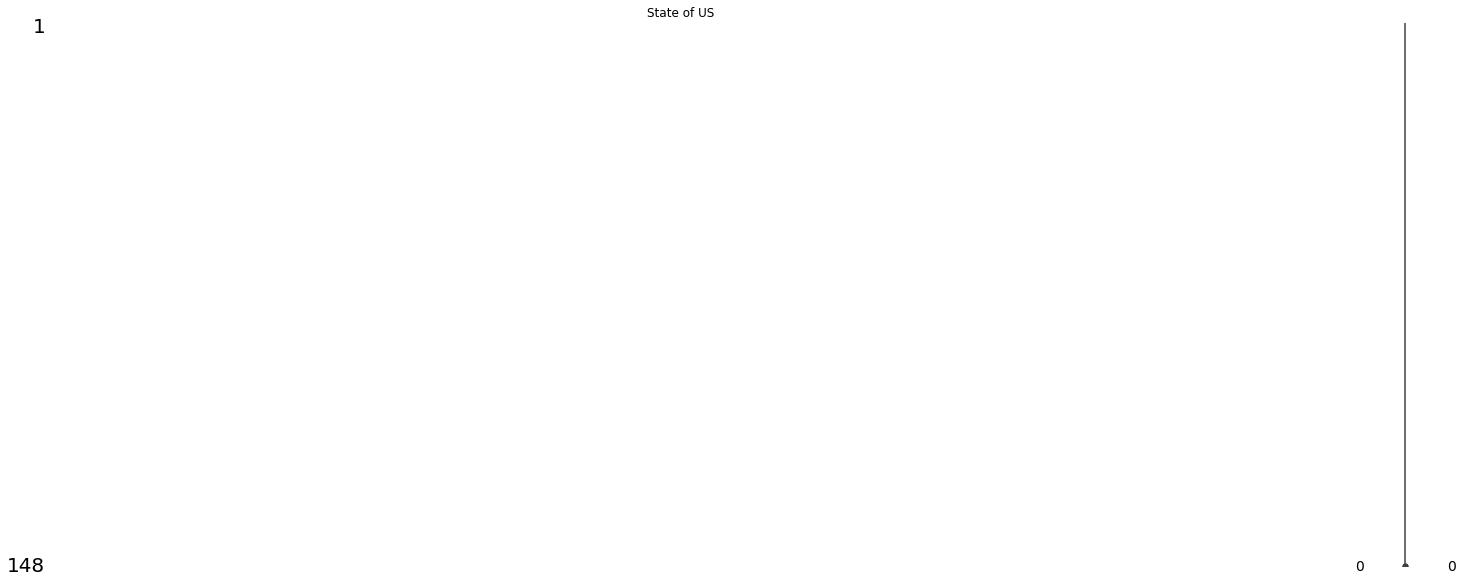

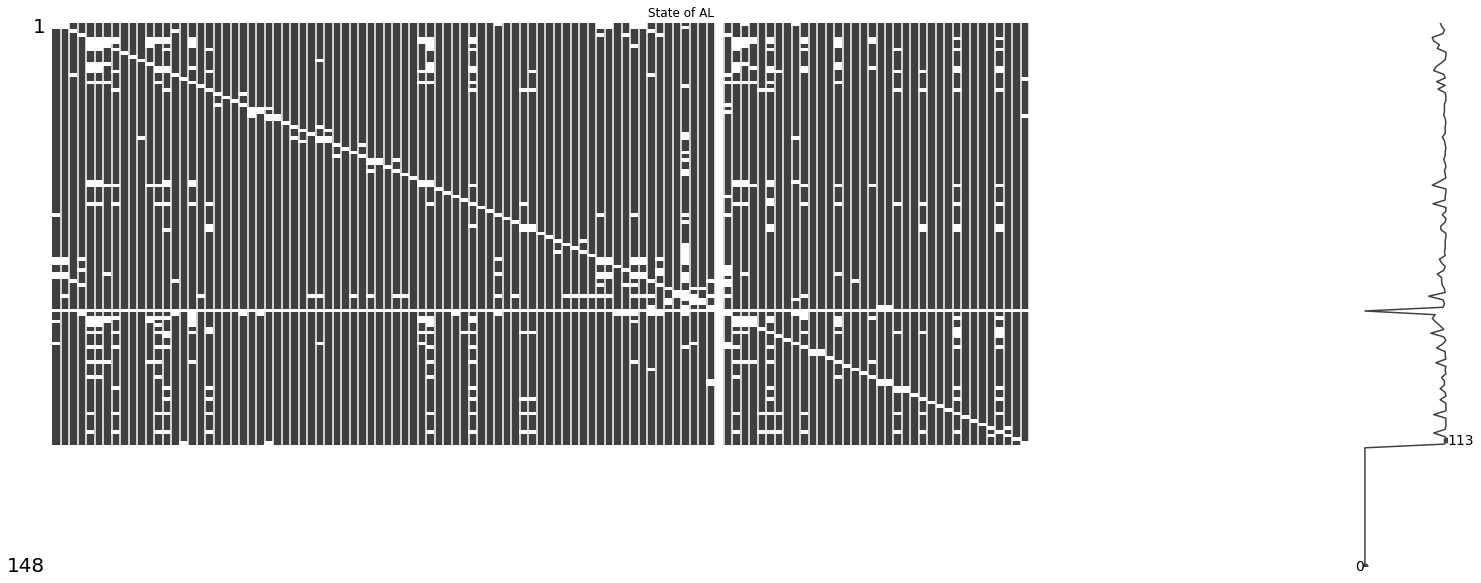

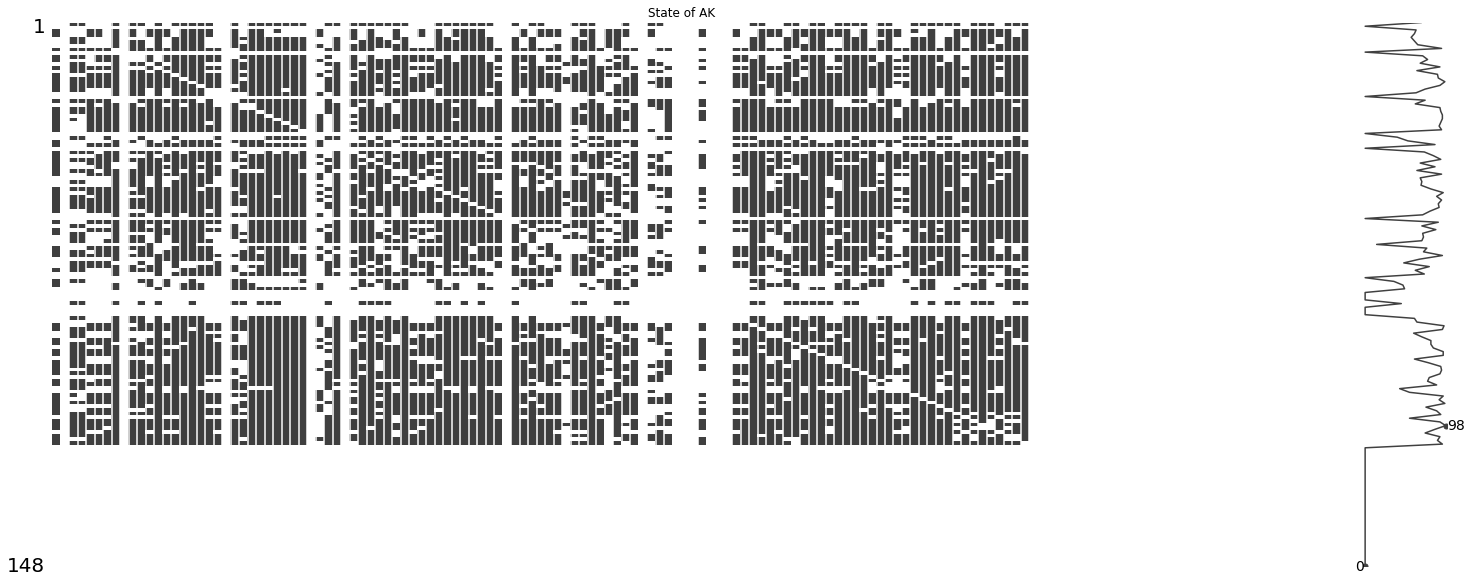

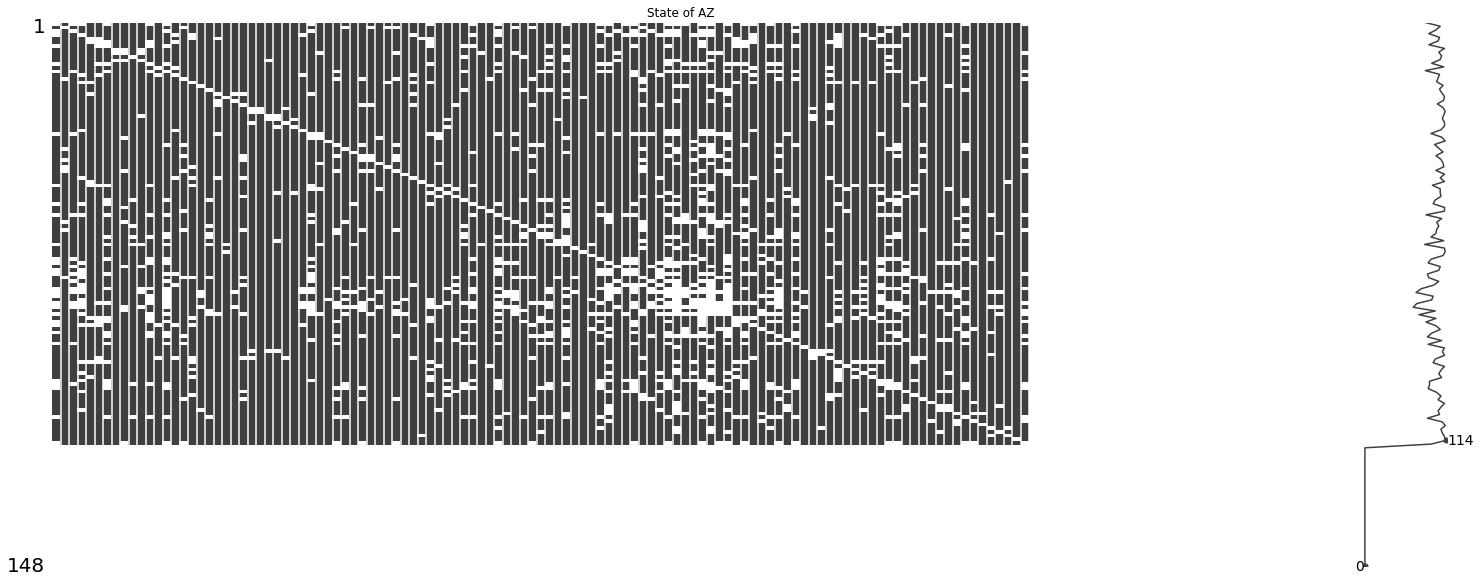

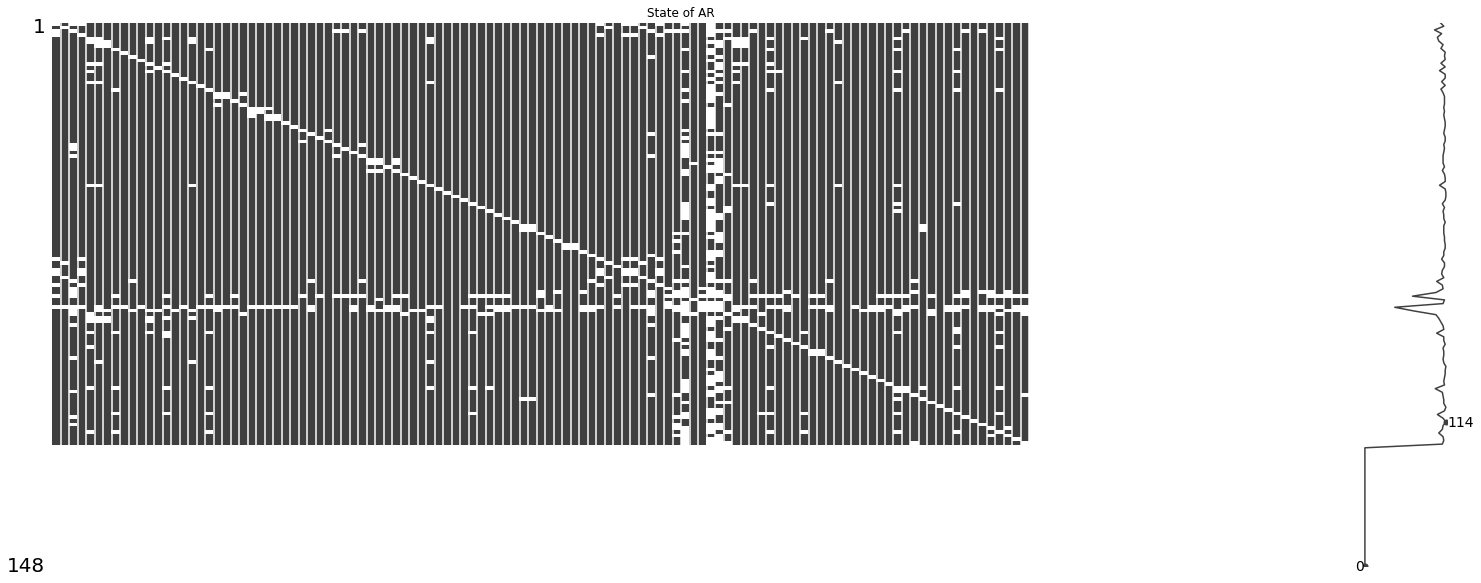

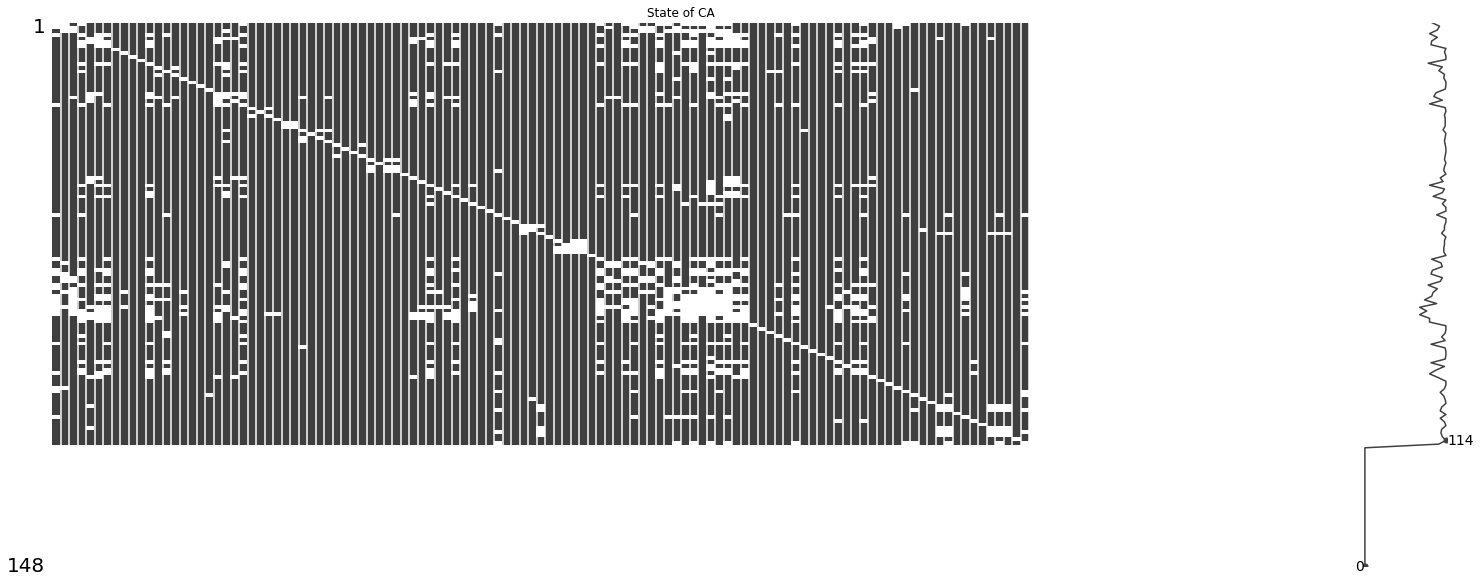

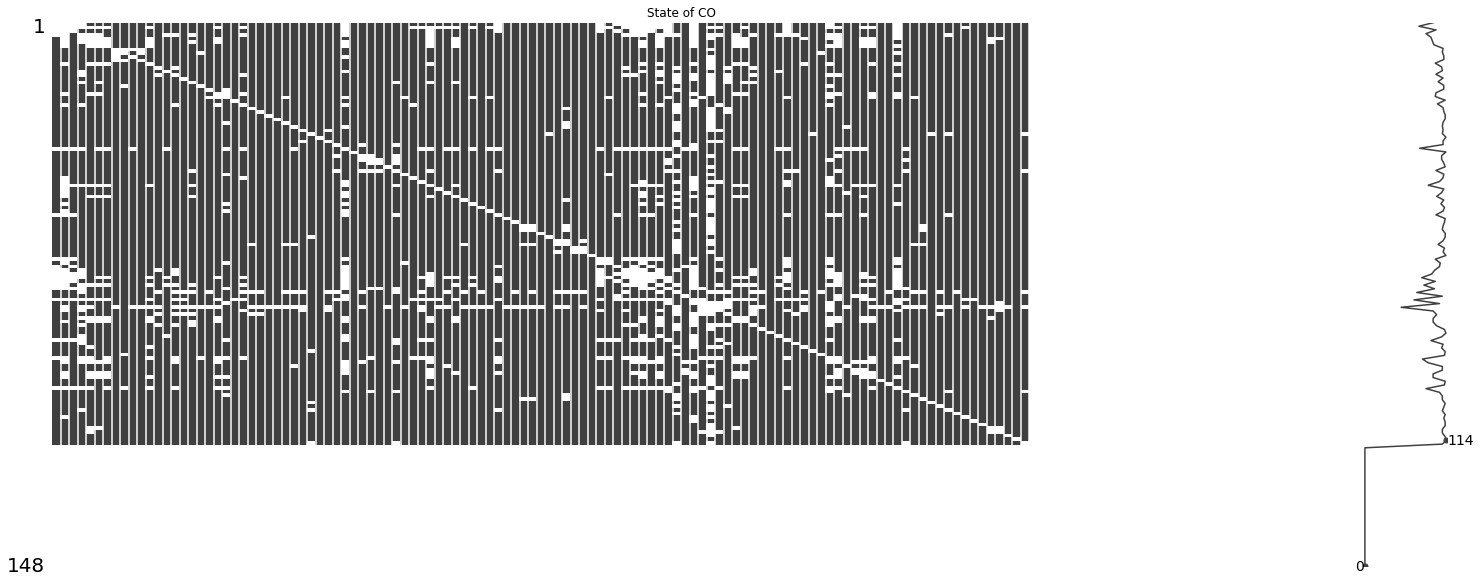

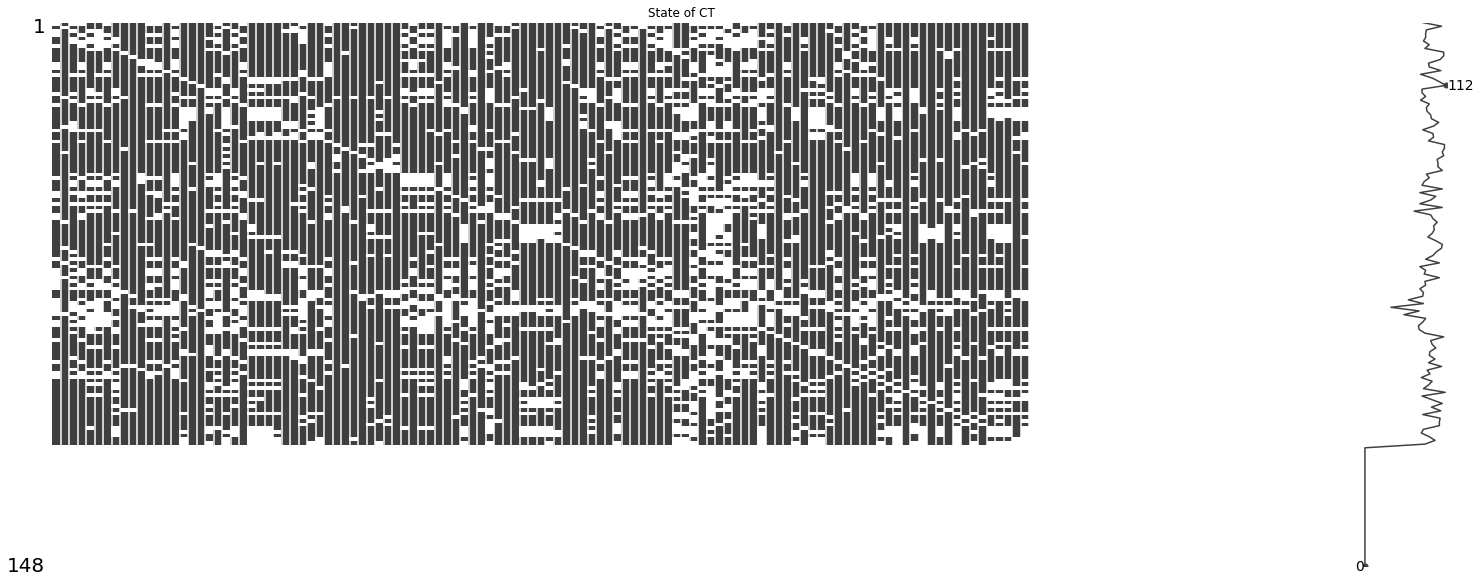

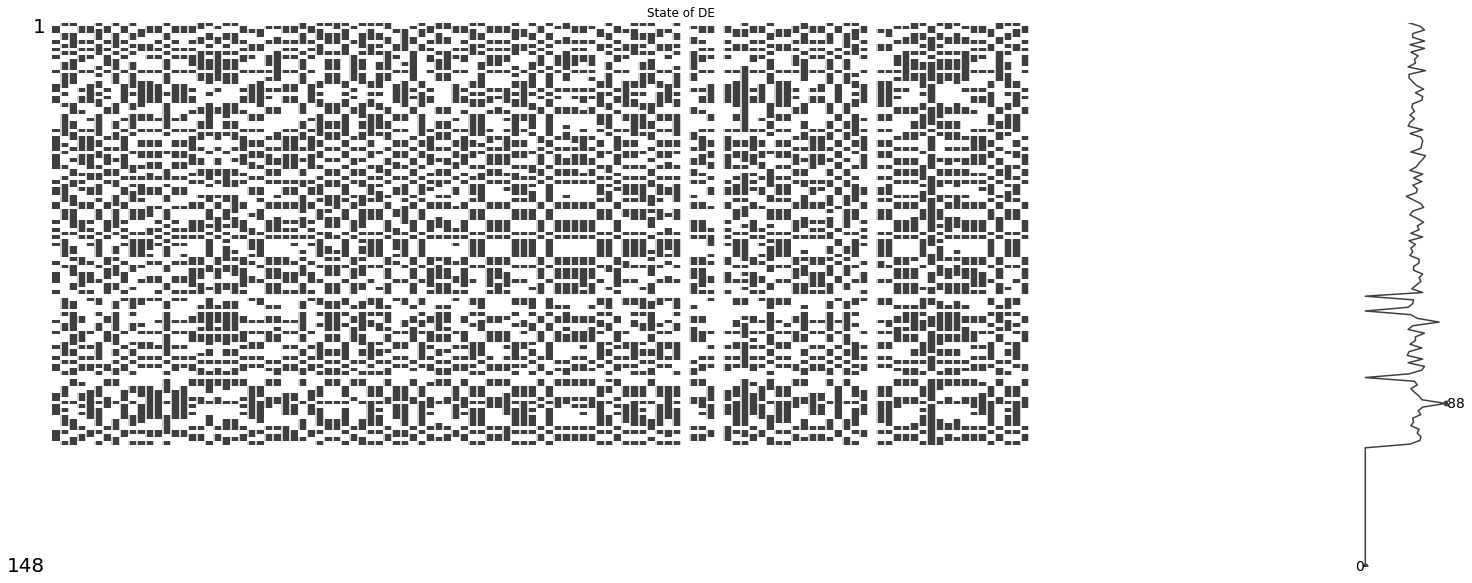

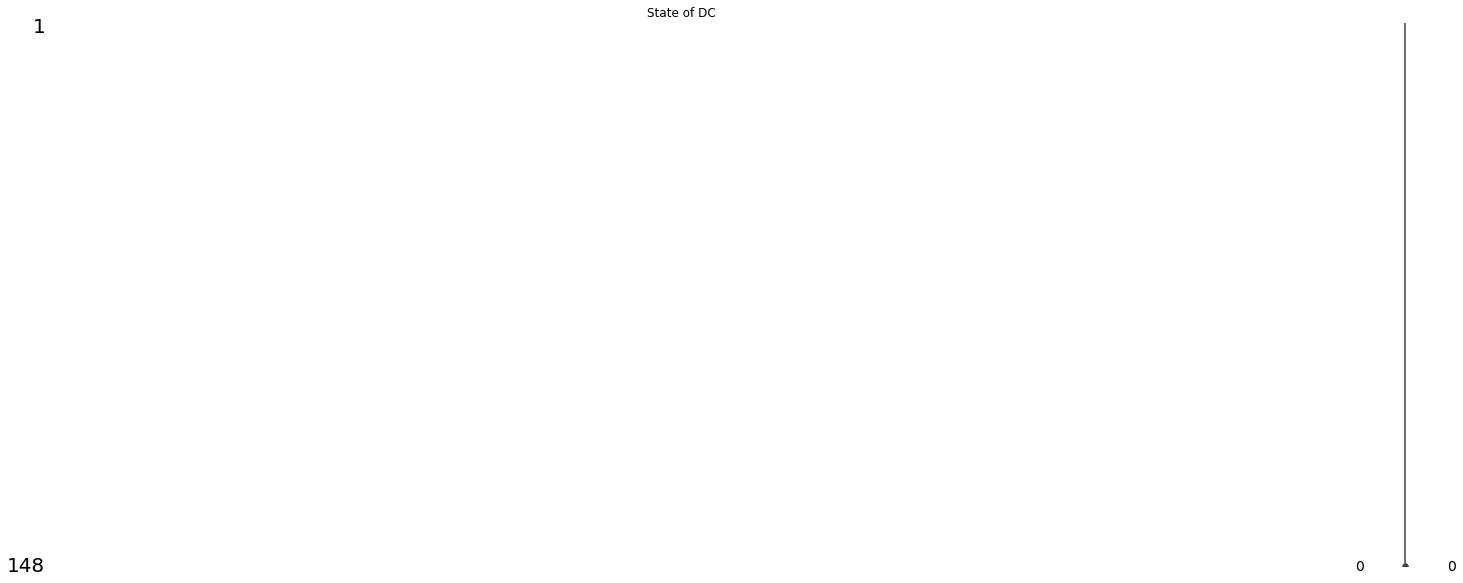

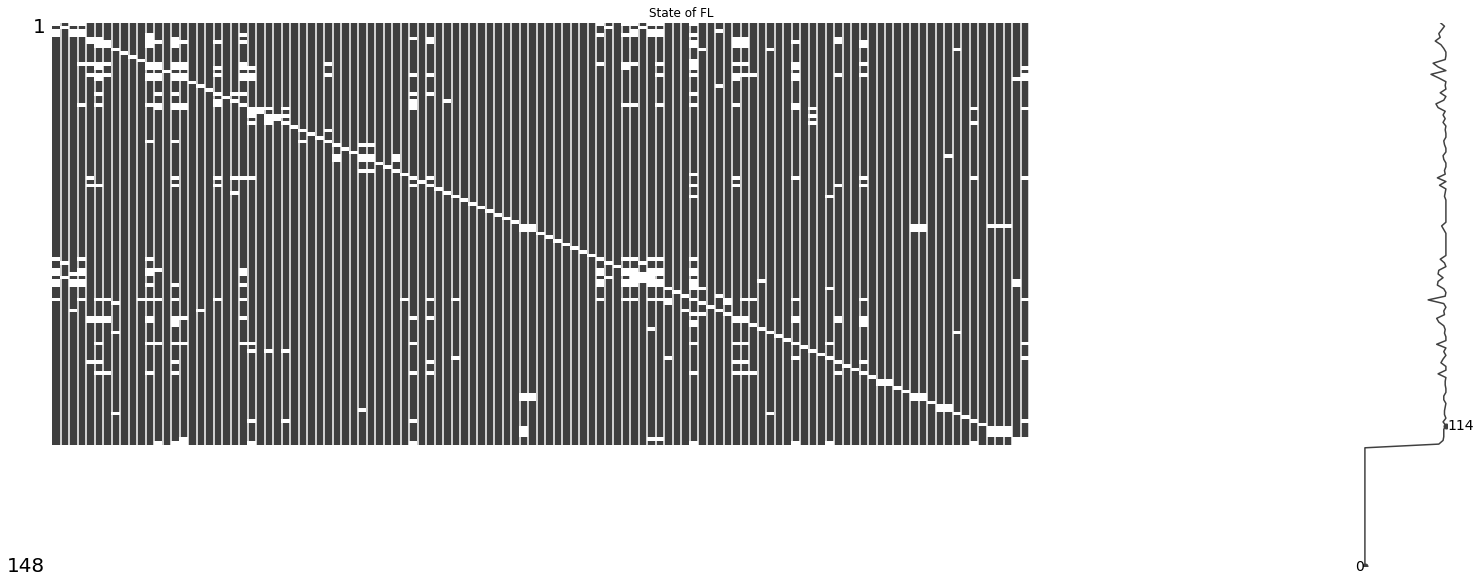

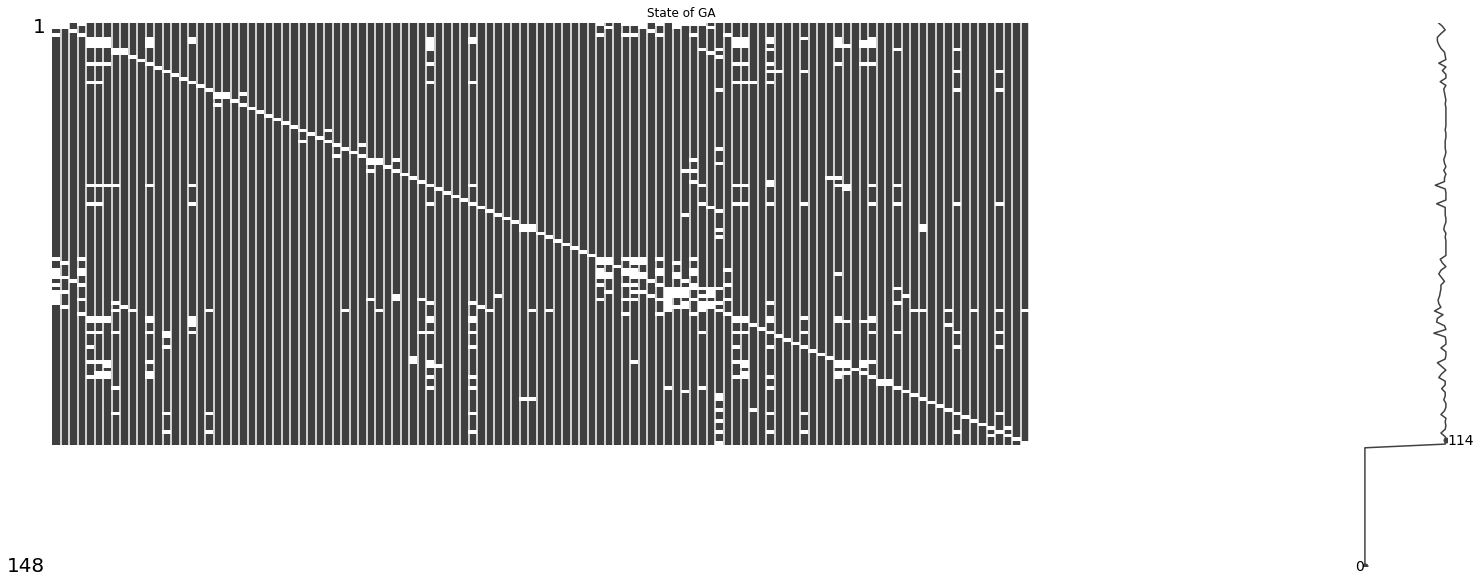

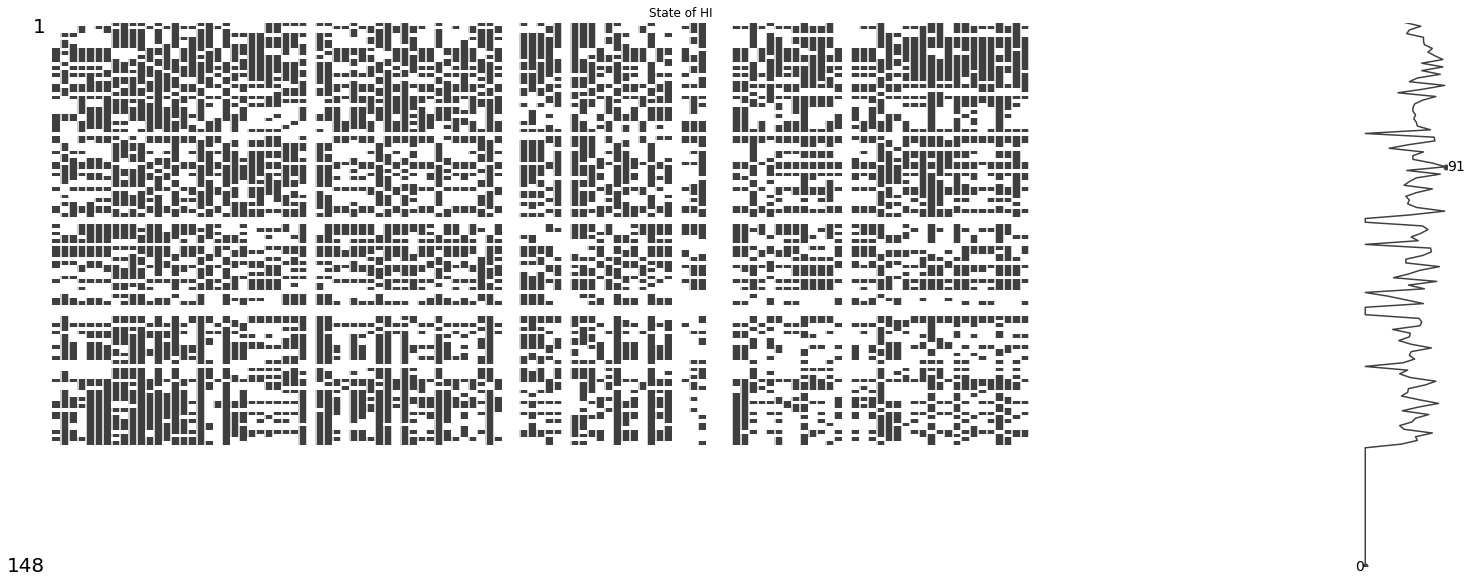

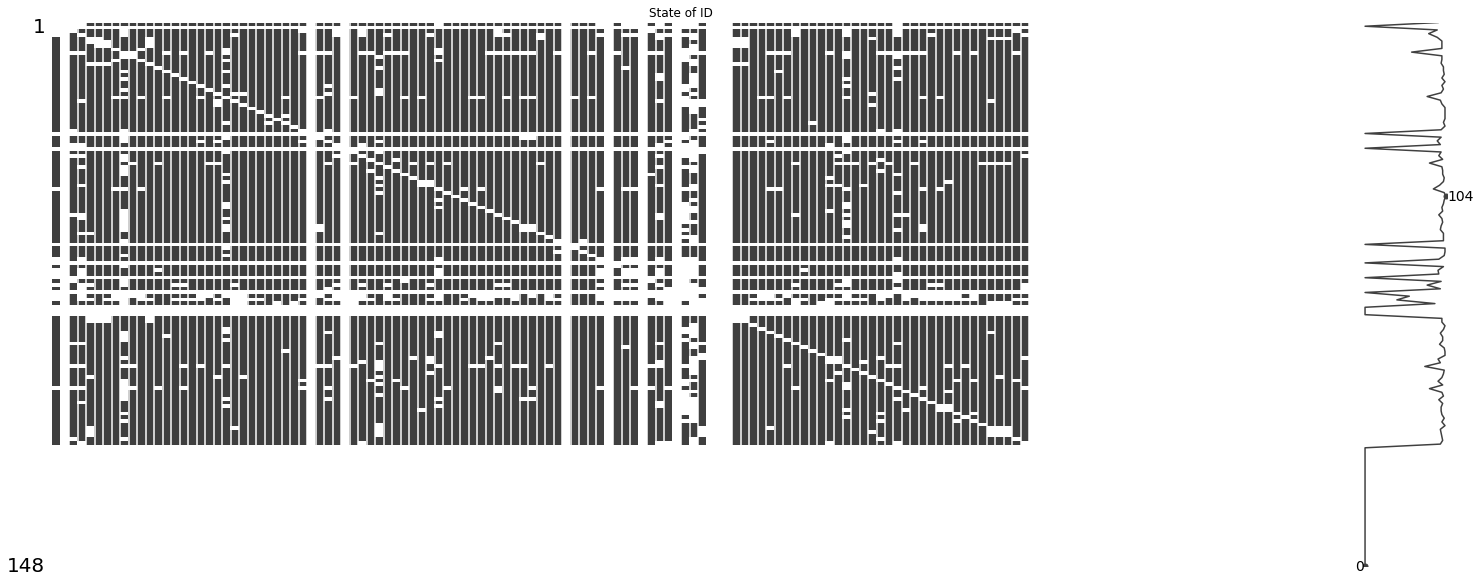

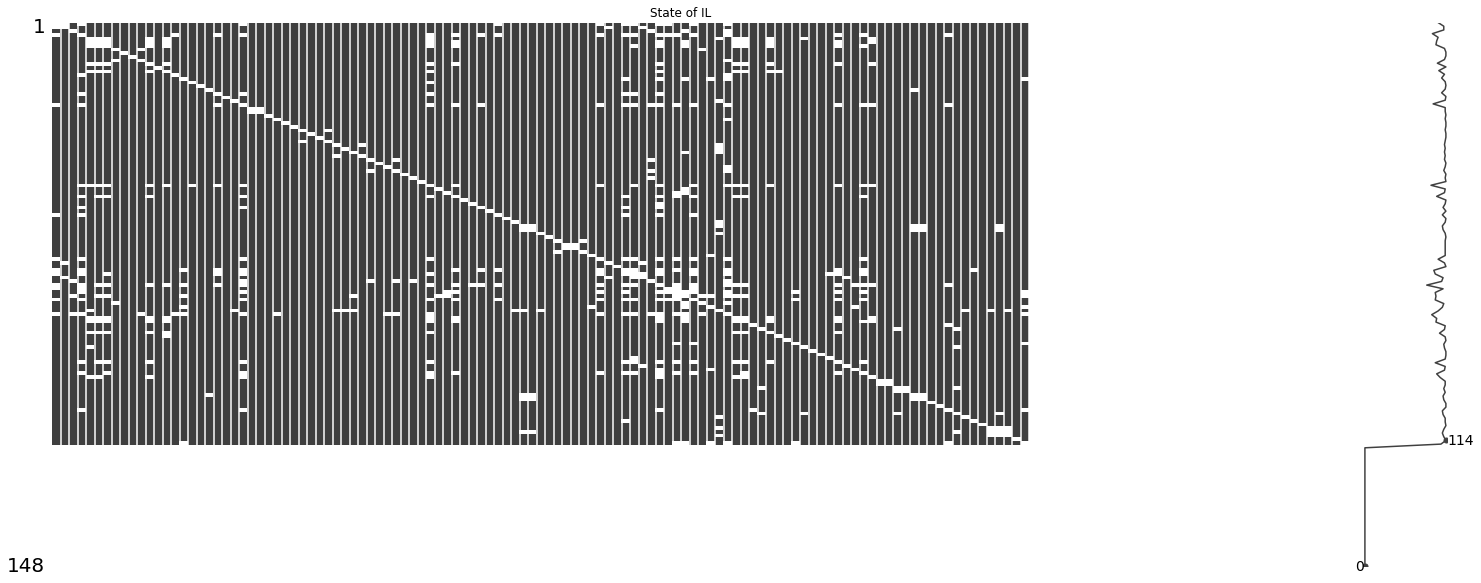

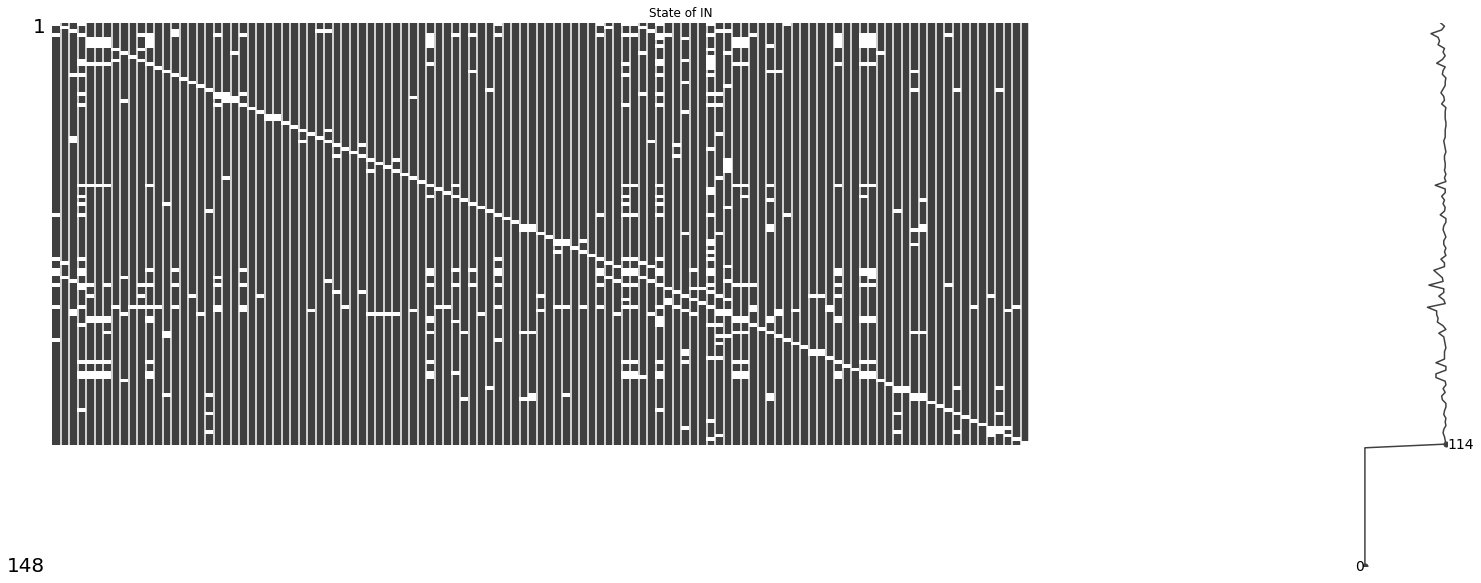

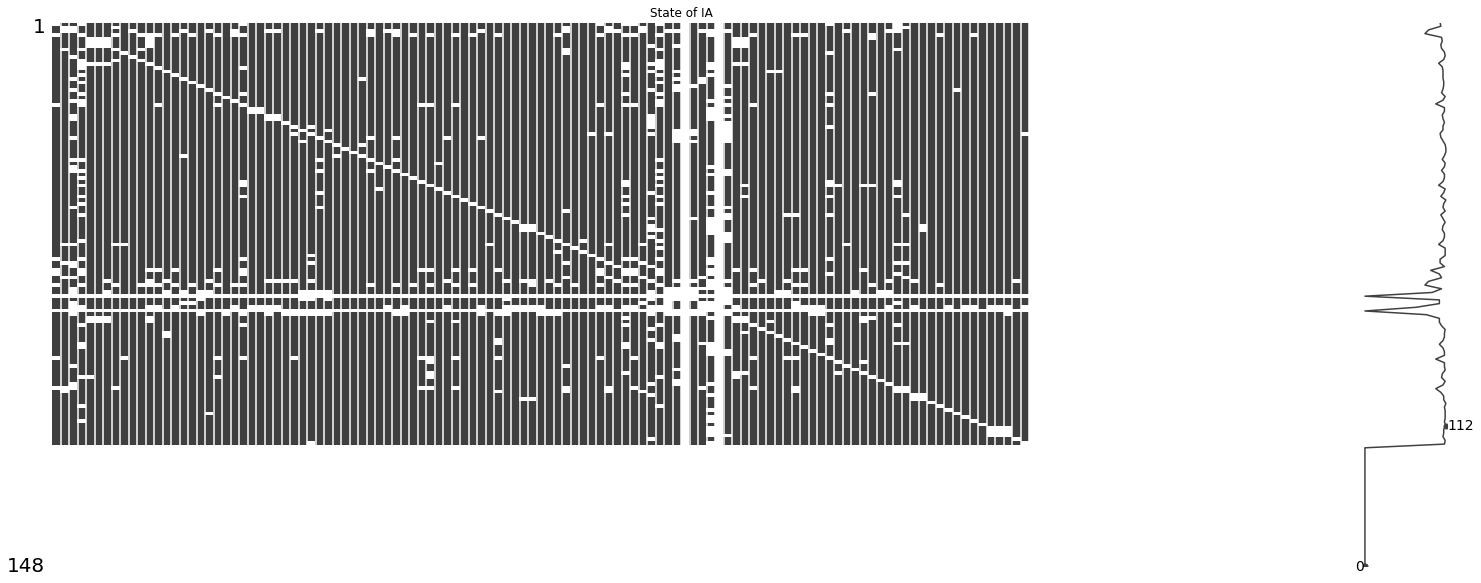

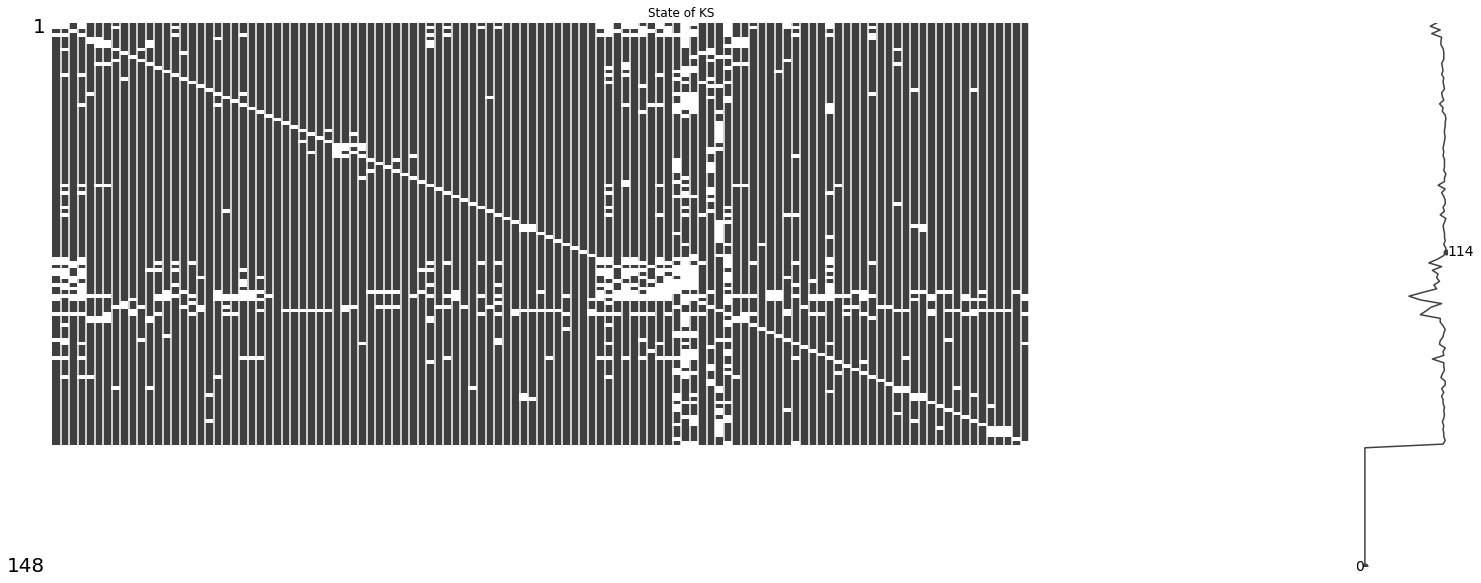

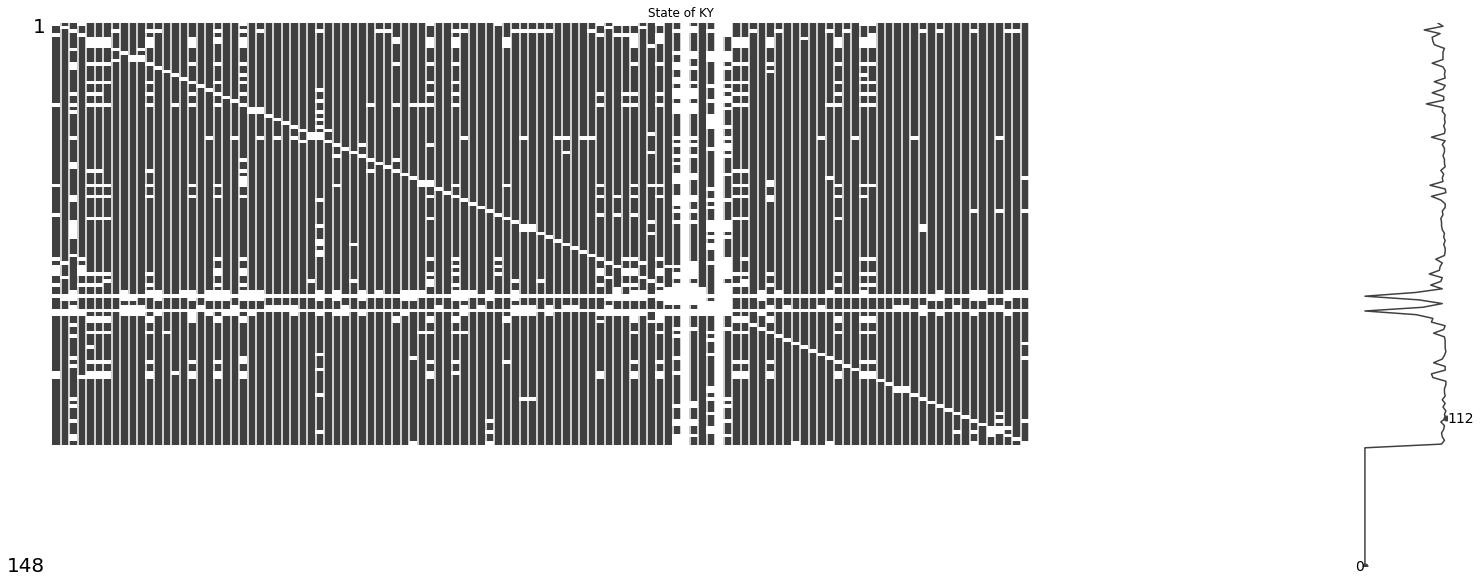

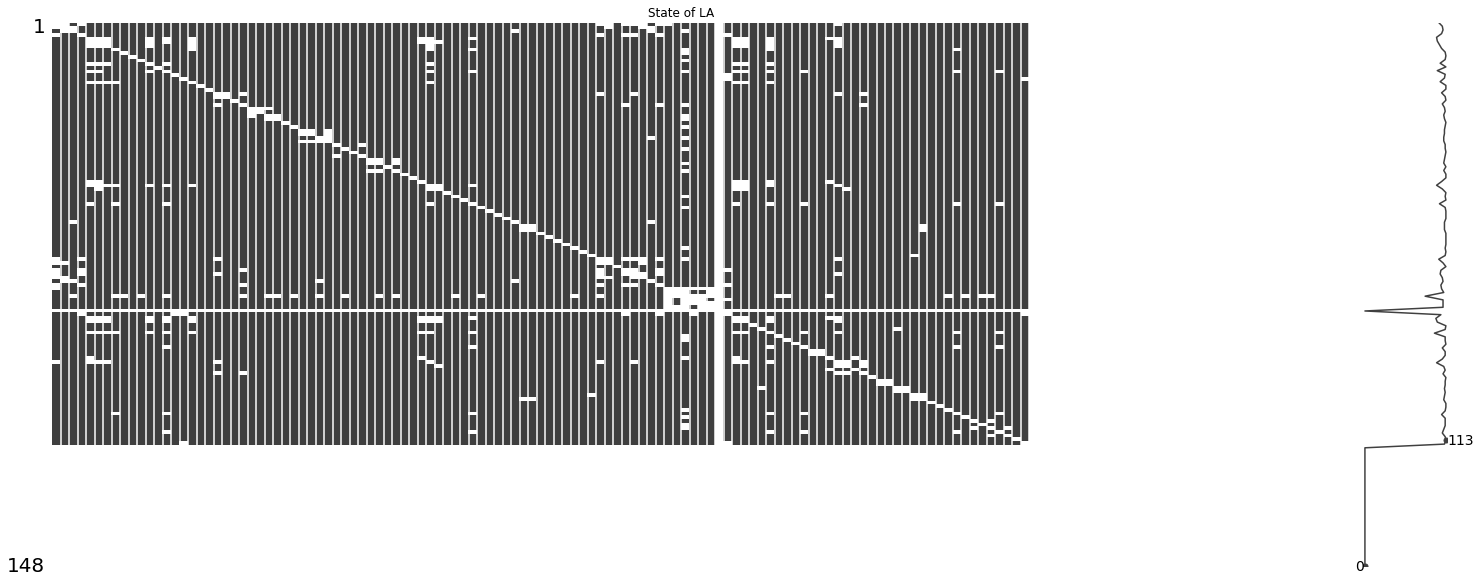

In [68]:
plt.close()
for state in df.state_abbreviation.unique()[0:20]:   
    corr = df[df.state_abbreviation==state].drop(columns=['state_fips_code', 'county_fips_code', '5_digit_fips_code', 'uninsured', 'uninsured_adults',
                            'uninsured_children']).corr()
    corr = corr[(corr > -0.7) & (corr < 0.7)]
    (msn.matrix(corr))
    #plt.title(state)
    plt.title("State of " + state)
    #plt.savefig("Data/EDA_Visualizations/Missingno/" + state + "_collinearity.png")
    #plt.close()
            
    
    
    


Source: https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/

In [46]:
# Computing VIF 
# the independent variables set
sub_df = df[df.state_abbreviation=='TX'].drop(columns=['state_fips_code', 'county_fips_code', '5_digit_fips_code',
                                                       'state_abbreviation', 'name','uninsured', 'uninsured_children',
                                                       'uninsured_adults'])
vif_data_copy = sub_df.copy()


while not vif_data_copy.empty:
    interesting_vars = sub_df.columns.to_list()
    X = sub_df[interesting_vars]
    print(X)

    # VIF dataframe
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns

    # calculating VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                              for i in range(len(X.columns))]

    print(vif_data)

    if float('inf') in vif_data["VIF"].unique():
        feature_list = vif_data[vif_data['VIF']==float("inf")].feature.to_list()
        sub_df = sub_df.drop(columns=feature_list[0])
        vif_data_copy = vif_data[vif_data.feature!= feature_list[0]]
    elif ~ vif_data[vif_data['VIF'] >= 5].empty:
        feature_list = vif_data[vif_data['VIF']>= 5].feature.to_list()
        sub_df = sub_df.drop(columns=feature_list[0])
        vif_data_copy = vif_data[vif_data.feature!= feature_list[0]]
    else:
        vif_data_copy = pd.DataFrame()

sub_df

      premature_death  premature_death_black  premature_death_hispanic  \
2567      6681.323364                    NaN                       NaN   
2568     10272.949118           12962.159784              10880.315229   
2569      7952.973251                    NaN               7774.144329   
2570      9018.498513           14014.161619               4450.704830   
2571      9315.870361                    NaN               6088.571549   
...               ...                    ...                       ...   
2817      9457.366431           11529.284333               5200.873212   
2818      8031.592211                    NaN               6346.983631   
2819     10234.600248                    NaN                       NaN   
2820      6770.768596                    NaN                       NaN   
2821      9389.759155                    NaN                       NaN   

      premature_death_white  poor_or_fair_health  poor_physical_health_days  \
2567                    NaN     

MissingDataError: exog contains inf or nans